# Import data

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np

def column_df_to_row(column_df):
    return column_df.to_numpy()[:, 0]
def np_back_to_df(original_df, array):
    return pd.DataFrame(array, index=original_df.index, columns=original_df.columns)
input_path = "all_seasons_merged_mult.csv"
output_prefix = "all_seasons_merged_mult_"
main_data = pd.read_csv(input_path) 
label_column = 'ttl_pts'

print("Shape: ", main_data.shape)

main_input = main_data.loc[:, main_data.columns != label_column]
main_output = main_data[[label_column]]

Shape:  (24154, 52)


# Divide into training and testing
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [17]:
init_train, init_test, init_train_label, init_test_label = train_test_split(main_input, main_output, test_size=.3, random_state=42)
print("Training shape: ", init_train.shape)
print("Testing shape: ", init_test.shape)

Training shape:  (16907, 51)
Testing shape:  (7247, 51)


# Describe training data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
count,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,...,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000
mean,464.730050,3408.872552,25.417562,63.998884,5431.752025,11235.273062,0.239921,1360.848448,48.997104,0.122414,...,8591.521052,469.004898,9803.319588,58.690538,67.136795,204.936572,178.376138,1815.350839,2499.218994,0.283424
std,74.498179,399.048479,7.960322,18.842547,386.586113,729.836901,0.023595,149.779146,32.017548,0.017797,...,614.588656,76.137730,1123.649777,12.723098,13.994544,33.664562,27.614376,160.113782,117.748089,0.023660
min,162.000000,1458.540000,0.000000,0.000000,3452.400000,6747.720000,0.142800,714.000000,0.000000,0.000000,...,6480.250000,238.000000,5516.500000,6.000000,6.000000,66.000000,63.720000,1054.000000,1907.130000,0.171000
25%,415.426750,3143.952450,20.245750,51.626750,5158.541400,10782.641550,0.225000,1262.725500,25.891250,0.112200,...,8157.601150,416.663700,9063.637050,50.178600,58.021350,182.998900,160.347300,1708.301300,2420.440550,0.265200
50%,457.921600,3392.583000,24.393600,61.901100,5396.105000,11270.907000,0.239700,1347.957000,39.562500,0.122400,...,8470.814000,459.551500,9670.980100,57.463700,65.866200,201.500000,176.167400,1801.081000,2498.651500,0.280900
75%,506.110800,3652.846200,29.324750,74.112650,5681.479250,11719.278700,0.255000,1445.914400,62.395550,0.133000,...,8933.604700,511.752500,10408.900450,65.806400,75.081300,222.231600,193.579500,1906.172300,2577.440600,0.297000
max,980.000000,5859.150000,182.000000,344.020000,7694.100000,15559.830000,0.358400,2673.000000,240.000000,0.315000,...,12882.250000,1638.000000,18340.000000,190.050000,199.660000,572.000000,492.750000,3564.000000,3172.455000,0.402000


,ttl_pts
count,16907.000000
mean,199.335187
std,21.573177
min,121.000000
25%,184.000000
50%,198.000000
75%,213.000000
max,301.000000


<AxesSubplot:xlabel='ttl_pts', ylabel='Count'>

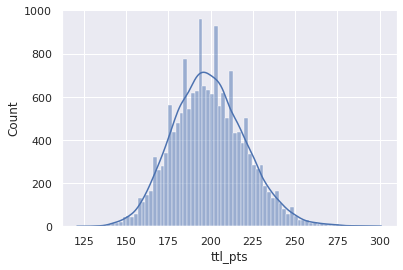

<AxesSubplot:xlabel='ttl_pts'>

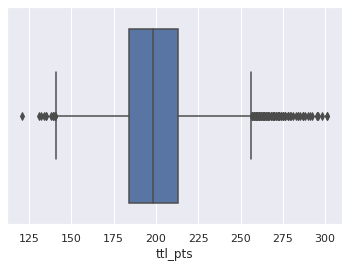

In [18]:
display(init_train.describe())
display(init_train_label.describe())
display(sns.histplot(init_train_label, x="ttl_pts", kde=True))
plt.show()
display(sns.boxplot(x="ttl_pts", data=init_train_label))

## Removing Outliers

<AxesSubplot:xlabel='ttl_pts', ylabel='Count'>

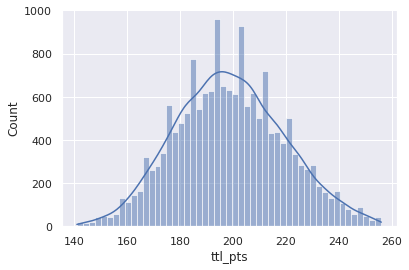

<AxesSubplot:xlabel='ttl_pts'>

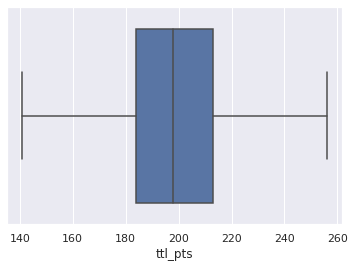

In [19]:
def remove_outliers_by_iqr(data, labels):
    lower = labels.quantile(.25)
    upper = labels.quantile(.75)
    diff = upper - lower
    
    lower_bound = lower - 1.5 * diff
    upper_bound = upper + 1.5 * diff
    valid = (labels >= lower_bound) & (labels <= upper_bound)
    rows_to_select = valid.to_numpy()[:, 0]
    input, labels = data.loc[rows_to_select], labels.loc[rows_to_select]
    input.sort_index(axis=0)
    labels.sort_index(axis=0)
    return input, labels

init_train, init_train_label = remove_outliers_by_iqr(init_train, init_train_label)

display(sns.histplot(init_train_label, x="ttl_pts", kde=True))
plt.show()
display(sns.boxplot(x="ttl_pts", data=init_train_label))

# Standardize data
https://scikit-learn.org/stable/modules/preprocessing.html

Then describe training data again

In [20]:
def scale_dataframe(df):
    scaled_values = preprocessing.scale(df)
    return np_back_to_df(df, scaled_values)
scaled_train = scale_dataframe(init_train)
scaled_test = scale_dataframe(init_test)

display(scaled_train.describe())
display(scaled_train.head())

,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
count,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,...,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04
mean,-6.795850e-17,-5.871360e-16,9.454290e-17,1.528801e-16,6.081279e-16,1.420131e-16,-8.632108e-16,-4.253503e-16,9.181289e-17,1.067404e-15,...,3.710683e-17,-2.110848e-16,5.108020e-16,6.721637e-16,2.948933e-16,-1.511838e-16,-1.491907e-15,-5.457752e-16,-5.943454e-16,1.494239e-15
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,...,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-4.079098e+00,-4.885337e+00,-3.191224e+00,-3.398177e+00,-5.124112e+00,-6.189252e+00,-4.129293e+00,-4.367214e+00,-1.535649e+00,-6.869571e+00,...,-3.464233e+00,-3.031571e+00,-3.860701e+00,-4.138580e+00,-4.369621e+00,-4.124035e+00,-4.155560e+00,-4.767425e+00,-5.036541e+00,-4.764574e+00
25%,-6.609070e-01,-6.641322e-01,-6.497144e-01,-6.558276e-01,-7.070118e-01,-6.212738e-01,-6.288485e-01,-6.556642e-01,-7.228472e-01,-5.729788e-01,...,-7.061846e-01,-6.871117e-01,-6.595757e-01,-6.692979e-01,-6.508494e-01,-6.514119e-01,-6.533666e-01,-6.673673e-01,-6.695178e-01,-7.676619e-01
50%,-8.949482e-02,-4.154762e-02,-1.293957e-01,-1.101504e-01,-9.201067e-02,4.990291e-02,-2.856503e-03,-8.223426e-02,-2.932775e-01,-5.613611e-04,...,-1.961640e-01,-1.246558e-01,-1.145352e-01,-9.623897e-02,-9.071666e-02,-1.016104e-01,-8.089256e-02,-8.725917e-02,-5.367158e-03,-1.015098e-01
75%,5.574325e-01,6.099145e-01,4.906421e-01,5.359749e-01,6.433534e-01,6.675705e-01,6.486862e-01,5.736475e-01,4.170773e-01,5.943039e-01,...,5.578199e-01,5.606807e-01,5.431378e-01,5.582915e-01,5.667970e-01,5.133842e-01,5.491574e-01,5.660449e-01,6.638912e-01,5.816143e-01
max,6.961561e+00,6.136643e+00,1.966199e+01,1.488068e+01,5.862897e+00,4.344827e+00,5.051922e+00,5.191635e+00,6.033362e+00,1.080803e+01,...,7.071772e+00,1.534544e+01,5.262544e+00,1.032403e+01,9.467131e+00,1.089697e+01,1.138260e+01,1.096428e+01,5.722463e+00,5.036772e+00


,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
20721,-1.011382,-1.258480,-0.204987,0.495073,1.749296,0.051986,0.222841,-0.114887,0.724149,-0.387785,...,0.090887,-0.409871,0.233083,-0.468511,-0.475696,-0.941873,-0.764864,0.012534,0.547580,0.581614
8165,-1.041634,-0.662172,-0.856856,-0.895819,-0.724664,1.050827,-0.194487,-0.937173,-0.789045,-0.084740,...,-1.271468,0.662839,-1.127639,-1.113950,-0.792228,-0.403806,0.088201,-1.359709,-0.563869,-0.334875
13175,0.488436,-0.519005,-0.618957,-0.967336,-0.776132,1.521905,1.951771,1.340740,0.870496,1.144274,...,0.490751,-0.696785,1.295106,-1.346090,-1.497384,-0.367352,-0.455274,-0.396187,-0.961775,1.981807
7163,-0.570874,-1.005485,0.705676,0.288157,-0.306214,-0.037449,-0.002857,0.258854,-0.817375,-0.000561,...,-0.165275,0.705859,0.284456,-0.697257,-0.698088,0.091006,0.152468,0.387728,1.131984,0.123370
16741,-0.382566,-0.125232,-0.328595,-0.289124,0.046598,0.517200,0.009919,-0.433357,0.126156,-0.191367,...,-1.134318,-0.764913,-0.389969,-0.514016,-0.208578,-0.695665,-0.389005,-0.622047,0.473885,-0.326389


# Correlation Heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html

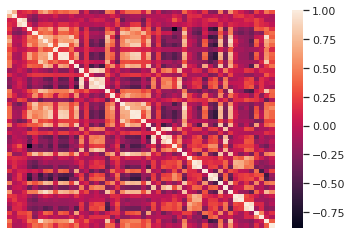

In [21]:
def plot_correlation_heatmap(input, labels, ax=None, annot=False, ticks='auto' ):
    merged = pd.concat([input, init_train_label], axis=1)
    sns.heatmap(merged.corr(method='pearson'), ax=ax, annot=annot, xticklabels=ticks, yticklabels=ticks)
plot_correlation_heatmap(scaled_train, init_train_label, ticks=False)

# Feature selection
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

,ast,def_rtg,efg,fg,fg3,fg3a,fg3a_per_fga_pct,fga,off_rtg,opp_ast,opp_efg_pct,opp_fg,opp_fg3,opp_fg3a,opp_fg_pct,opp_fga,opp_pts,pace,pts,ts_pct
20721,-1.011382,0.051986,0.222841,-0.114887,0.724149,0.884606,1.160915,-0.332831,0.520049,-1.324743,-0.066726,-0.298773,0.522187,0.715866,-0.298452,-0.318021,-0.069279,0.090887,0.233083,0.581614
8165,-1.041634,1.050827,-0.194487,-0.937173,-0.789045,-0.855638,-0.931296,-1.159329,-0.545085,-0.130444,0.224666,-0.316500,-0.492498,-0.569908,0.724007,-1.087843,-0.293198,-1.271468,-1.127639,-0.334875
13175,0.488436,1.521905,1.951771,1.340740,0.870496,0.686288,1.042909,0.454123,1.610644,-0.587080,1.121258,1.587688,-0.136539,-0.106457,1.691198,1.152324,1.231495,0.490751,1.295106,1.981807
7163,-0.570874,-0.037449,-0.002857,0.258854,-0.817375,-0.899584,-0.727178,-0.787664,0.669649,-0.637987,-1.277125,-0.307748,-0.664344,-0.642874,-1.417630,0.119520,-0.109288,-0.165275,0.284456,0.123370
16741,-0.382566,0.517200,0.009919,-0.433357,0.126156,0.190458,0.523045,-0.458304,0.471587,0.091912,0.224666,-0.038127,-0.213692,-0.311126,0.724007,-0.660270,-0.371052,-1.134318,-0.389969,-0.326389


,ast,def_rtg,efg,fg,fg3,fg3a,fg3a_per_fga_pct,fga,off_rtg,opp_ast,opp_efg_pct,opp_fg,opp_fg3,opp_fg3a,opp_fg_pct,opp_fga,opp_pts,pace,pts,ts_pct
20721,-1.011382,0.051986,0.222841,-0.114887,0.724149,0.884606,1.160915,-0.332831,0.520049,-1.324743,-0.066726,-0.298773,0.522187,0.715866,-0.298452,-0.318021,-0.069279,0.090887,0.233083,0.581614
8165,-1.041634,1.050827,-0.194487,-0.937173,-0.789045,-0.855638,-0.931296,-1.159329,-0.545085,-0.130444,0.224666,-0.316500,-0.492498,-0.569908,0.724007,-1.087843,-0.293198,-1.271468,-1.127639,-0.334875
13175,0.488436,1.521905,1.951771,1.340740,0.870496,0.686288,1.042909,0.454123,1.610644,-0.587080,1.121258,1.587688,-0.136539,-0.106457,1.691198,1.152324,1.231495,0.490751,1.295106,1.981807
7163,-0.570874,-0.037449,-0.002857,0.258854,-0.817375,-0.899584,-0.727178,-0.787664,0.669649,-0.637987,-1.277125,-0.307748,-0.664344,-0.642874,-1.417630,0.119520,-0.109288,-0.165275,0.284456,0.123370
16741,-0.382566,0.517200,0.009919,-0.433357,0.126156,0.190458,0.523045,-0.458304,0.471587,0.091912,0.224666,-0.038127,-0.213692,-0.311126,0.724007,-0.660270,-0.371052,-1.134318,-0.389969,-0.326389


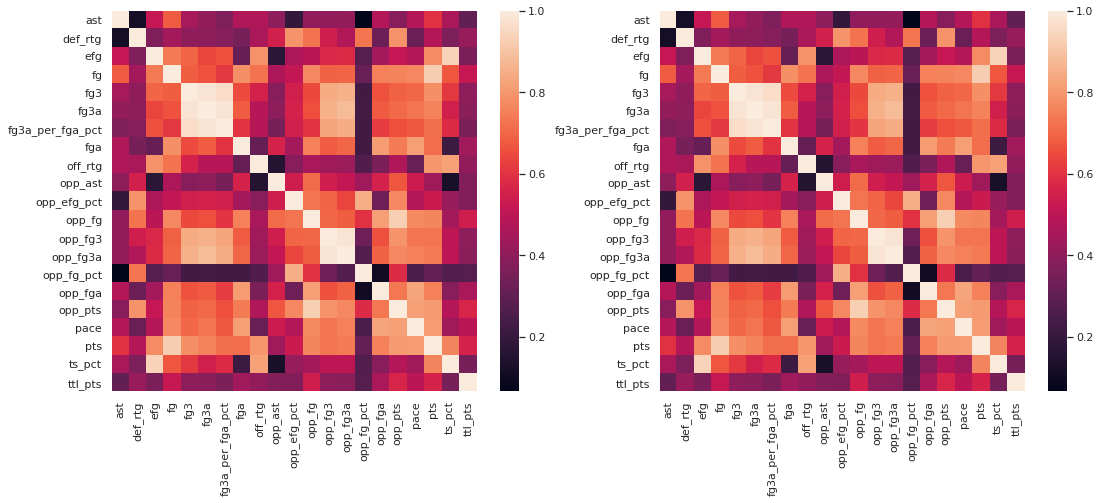

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(input, labels, method, k=20, ax=None):
    selector = SelectKBest(method, k=k)
    selector.fit(input, column_df_to_row(labels))
    selected = input.loc[:, selector.get_support()]
    display(selected.head())
    plot_correlation_heatmap(selected, labels, ax=ax)
    return selected
figure = plt.figure(figsize = (18,7))
ax1, ax2 = figure.subplots(1,2)
f_regression_select = select_features(scaled_train, init_train_label, f_regression, k=20, ax=ax1)
mutual_info_regression_select = select_features(scaled_train, init_train_label, mutual_info_regression, k=20, ax=ax2)

In [23]:
f_regression_columns = set(f_regression_select.columns)
mutual_info_columns = set(mutual_info_regression_select.columns)
display(f"Column diff {(f_regression_columns - mutual_info_columns) | (mutual_info_columns - f_regression_columns)}")

'Column diff set()'

## Removing redundant features
- Removing ft, ft_rt, fta (in favor of only fa_per_fga_pct)
- Removing orb in favor of only orb_pct)
- Removing stl (in favor of stl_pct)
- Removing opp_fg3a (in favor of opp_fg3)
- Removing opp_tov (in favor of opp_tov_pct)

Columns before removal: {'fg3a_per_fga_pct', 'opp_pts', 'opp_efg_pct', 'opp_fg_pct', 'opp_fg', 'fg3', 'ast', 'off_rtg', 'fg', 'opp_fg3a', 'opp_fga', 'efg', 'pts', 'def_rtg', 'pace', 'fga', 'opp_fg3', 'ts_pct', 'fg3a', 'opp_ast'}
Columns after removal: {'fg3a_per_fga_pct', 'opp_pts', 'opp_efg_pct', 'opp_fg_pct', 'opp_fg', 'fg3', 'ast', 'off_rtg', 'fg', 'opp_fga', 'efg', 'pts', 'def_rtg', 'pace', 'fga', 'opp_fg3', 'ts_pct', 'fg3a', 'opp_ast'}


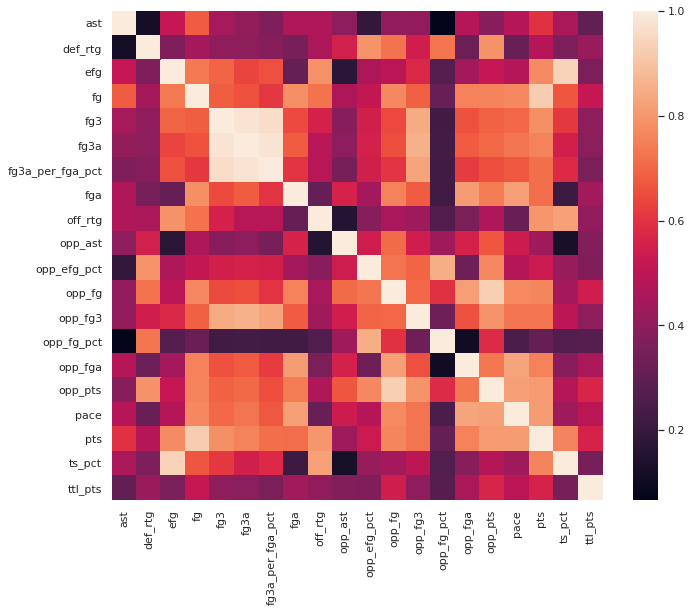

In [24]:
print(f"Columns before removal: {set(f_regression_select.columns)}")
columns_to_drop = ['ft', 'ft_rt', 'fta', 'orb_pct', 'stl', 'opp_fg3a', 'opp_tov', 'trb', 'to']
def attempt_to_drop_columns(df, columns):
    for column in columns:
        try:
            df = df.drop(labels=[column], axis=1)
        except KeyError as error:
            continue
    return df

f_regression_select = attempt_to_drop_columns(f_regression_select, columns_to_drop)
print(f"Columns after removal: {set(f_regression_select.columns)}")
figure = plt.figure(figsize = (11,9))
plot_correlation_heatmap(f_regression_select, init_train_label, ax=figure.gca())

# Keeping the final features
test_select = scaled_test[f_regression_select.columns]

## Looking at the relationship between some features and our target label

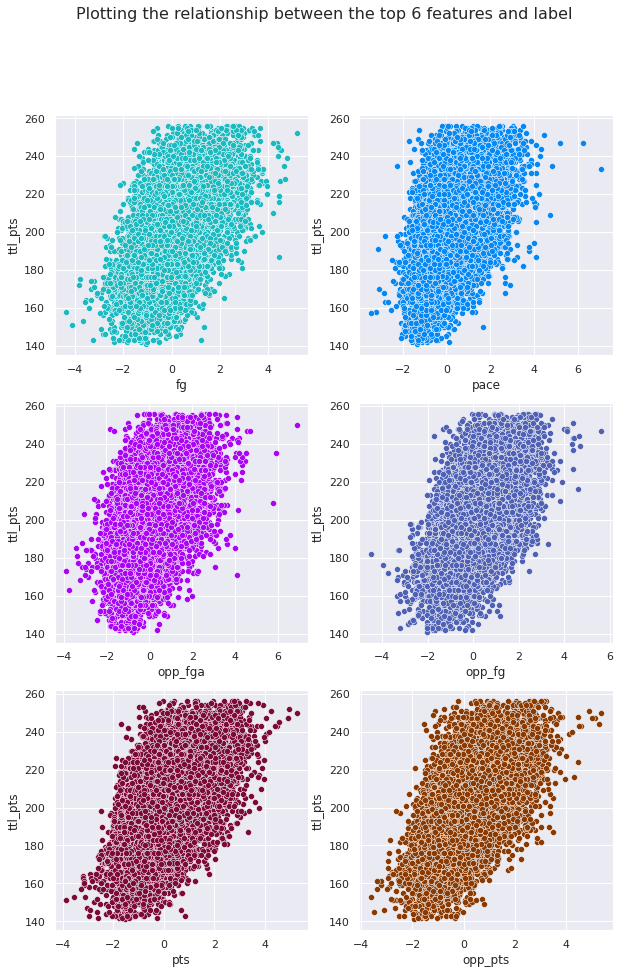

In [25]:
k = 6
selector = SelectKBest(f_regression, k=k)
selector.fit(f_regression_select, column_df_to_row(init_train_label))
features_to_view = f_regression_select.loc[:, selector.get_support()]
fig, axs = plt.subplots(k // 2, 2, figsize=(10, 15))
row_index = 0
column_index = 0
for column in set(features_to_view.columns):
    x = features_to_view[column]
    sns.scatterplot(x=x, y=init_train_label['ttl_pts'], ax = axs[row_index, column_index], color=np.random.rand(3))
    column_index = column_index + 1
    if column_index == 2:
        column_index = 0
        row_index = row_index + 1
fig.suptitle(f"Plotting the relationship between the top {k} features and label", fontsize=16)
plt.show()


# Dimensionality Reduction with PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

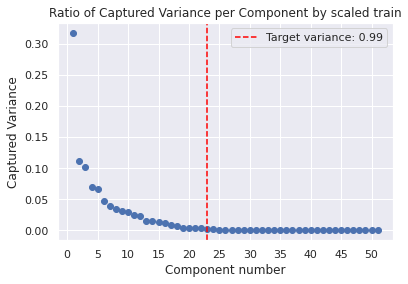

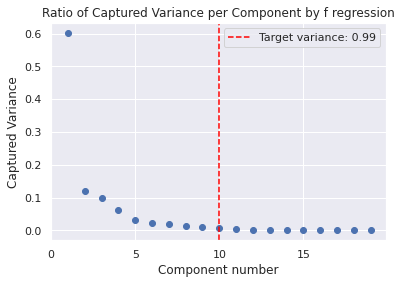

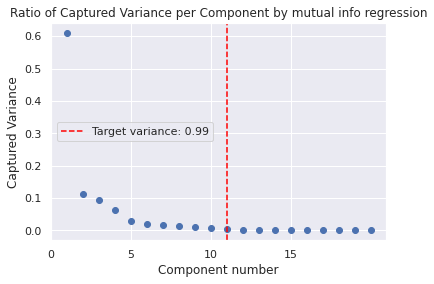

In [26]:
from sklearn.decomposition import PCA

def pca_scree_plot(X, label, max_components=100, target_variance=None):
    max_components = min(X.shape[1], max_components)
    pca = PCA(n_components=max_components)
    pca.fit(X)
    component_numbers = np.arange(1, max_components + 1)
    
    explained_variance = 0
    component_number = -1
    while target_variance and explained_variance < target_variance:
        component_number += 1
        explained_variance += pca.explained_variance_ratio_[component_number]
    
    plt.scatter(component_numbers, pca.explained_variance_ratio_)
    plt.xticks(range(0, max_components, 5))
    if target_variance:
        plt.axvline(x=component_number, linestyle='--', color='red', label=f"Target variance: {target_variance}")
    plt.xlabel('Component number')
    plt.ylabel('Captured Variance')
    plt.legend()
    plt.title(f"Ratio of Captured Variance per Component by {label}")
max_components = 20
pca_scree_plot(scaled_train, max_components = 100, label='scaled train', target_variance=.99)
plt.show()
pca_scree_plot(f_regression_select, max_components = max_components, label='f regression', target_variance=.99)
plt.show()
pca_scree_plot(mutual_info_regression_select, max_components = max_components, label='mutual info regression', target_variance=.99)



## Apply PCA and Export
Apply PCA of only 10 components to train and test

In [27]:
def export_dataset(name, input, labels):
    if input.shape[0] != labels.shape[0]:
        raise ValueError(f'Trying to merge incompatible datsets: {input.shape} ; {labels.shape}')
    output = pd.concat([input, labels], axis=1)
    if output.shape[0] != input.shape[0]:
        raise ValueError(f'An error occurred while merging the datasets')
    output.to_csv(path_or_buf=f'output-datasets/{output_prefix}{name}.csv', index=False)
    

pca = PCA(n_components=10)
pca.fit(f_regression_select)

train_pca = pd.DataFrame(data=pca.transform(f_regression_select), index=f_regression_select.index)
test_pca = pd.DataFrame(data=pca.transform(test_select), index=test_select.index)

# # scaled datsets
export_dataset('scaled-train', scaled_train, init_train_label)
export_dataset('scaled-test', scaled_test, init_test_label)

# features selected datsets
export_dataset('feature-selected-train', f_regression_select, init_train_label)
export_dataset('feature-selected-test', test_select, init_test_label)

# pca datasets
export_dataset('pca-train', train_pca, init_train_label)
export_dataset('pca-test', test_pca, init_test_label)



# Run DBScan and KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [14]:
from sklearn.cluster import OPTICS, KMeans
from sklearn.metrics import silhouette_score

datasets = [("scaled train", scaled_train), 
            ("f regression", f_regression_select), 
            ("mutual information regression", mutual_info_regression_select)]
clusters = range(10, 81, 10)
for dataset_name, dataset in datasets:
    scores = []
    inertia = []
    for number_of_clusters in clusters:
        kmeans = KMeans(n_clusters=number_of_clusters)
        labels = kmeans.fit_predict(dataset)
        inertia.append(kmeans.inertia_)
        scores.append(silhouette_score(dataset, labels))
    plt.plot(clusters, scores, marker='1')
    plt.title(f"Number of clusters vs silhouette score for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    plt.plot(clusters, inertia, marker='1')
    plt.title(f"Number of clusters vs Inertia for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia (euclidean distance from center)")
    plt.show()
    
        

KeyboardInterrupt: 

# Clustering Evaluation
## KMeans
A silhouette score close to 1 is best--they are within the range of \[-1, 1\]. All of the clustering has low silhouette scores, suggesting the clustering is poor. Inertia (loss) starts leveling off, suggesting add more clusters won't improve clustering.